In [1]:
# Load dependecies

import cv2  # visual computer toolkit 
import numpy as np # mathematical library (matriz and vectors)
import matplotlib.pyplot as plt # visaulization 
import os, glob

In [2]:
# Load data

# Define files format
files_format = '.png'

# Gloabl path to files
path = os.path.join('.', 'data','SET001','*' + files_format)

# Create the list of files to read, files must contain only the five images
files_list = np.sort(glob.glob(path))

try:
    # read each band in uint8 format 0 - 255 integers 
    blue, green, nir, red, red_edge = [cv2.imread(files_list[i], cv2.IMREAD_GRAYSCALE) for i in range (len(files_list))]
except:
    print('Error 01: There is a problem reading files, check for the correct images in path')

In [3]:
# Create rgb canvas
rgb = np.zeros(shape= (blue.shape[0], blue.shape[1],3), dtype=np.uint8)

# assign the rgb image in matplot bands format
# for OpenCV format exchange the blue and red band
rgb[:,:,2], rgb[:,:,1], rgb[:,:,0] = blue, green, red

# uncoment this for image viusalization
#plt.figure(figsize=(30,22))
#plt.imshow(rgb / 255)

In [5]:
# Image enhancement
def image_enhancement(image, gamma_correction = 1.4 ,alpha = 1.5, beta = -0.5, gamma = 0 ):
    # normalization for gaussian filter and others
    rgb_normalized = np.float32(image) / 255

    # unsharped for improvement of rgb vis
    # Gaussian filter
    rgb_blur = cv2.GaussianBlur(src = rgb_normalized, ksize = (9,9), sigmaX=10.0)
    rgb_blur[rgb_blur < 0] = 0
    rgb_blur[rgb_blur > 1] = 1

    #  unsharped filter
    rgb_unsharped = cv2.addWeighted(rgb_normalized, alpha, rgb_blur, beta, gamma)
    rgb_unsharped [rgb_unsharped < 0] = 0
    rgb_unsharped [rgb_unsharped > 1] = 1


    # gamma correction, histogram equalization
    rgb_gamma = rgb_unsharped ** (1.0 / gamma_correction)
    rgb_gamma [rgb_gamma < 0] = 0
    rgb_gamma [rgb_gamma > 1] = 1

    return rgb_gamma

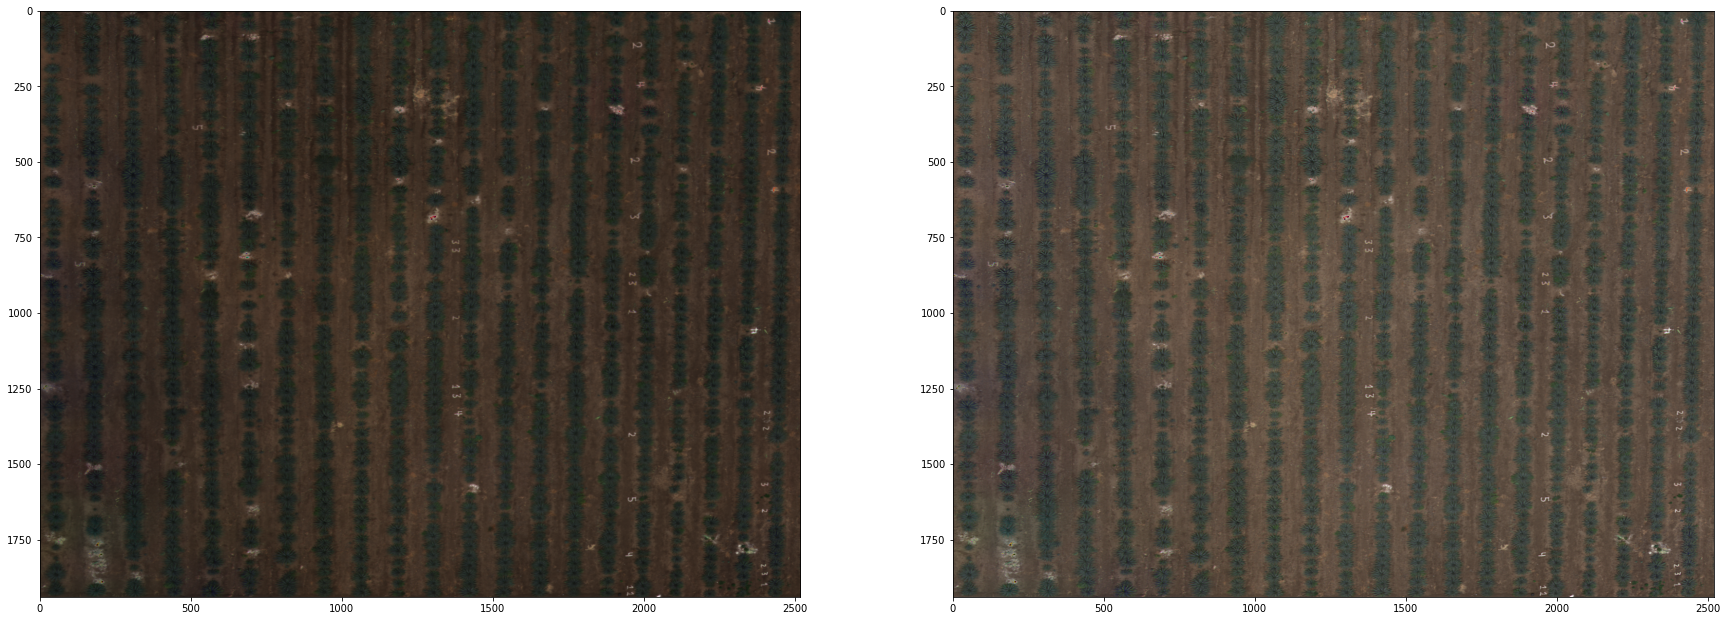

In [9]:
plt.figure(figsize=(30,20))
plt.subplot(1,2,1)
plt.imshow(rgb)
plt.subplot(1,2,2)
plt.imshow(image_enhancement(rgb))

In [7]:
X = image_enhancement(rgb)
X.max()

1.0